<a href="https://www.kaggle.com/code/mayarmohamedswilam/movie-rate?scriptVersionId=141397590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens/users.dat
/kaggle/input/movielens/ratings.dat
/kaggle/input/movielens/movies.dat


**Data Loading and Exploration**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
# Load the datasets with the correct encoding and engine
movies = pd.read_csv('/kaggle/input/movielens/movies.dat', sep='::', header=None, names=['MovieID', 'Title', 'Genres'], engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv('/kaggle/input/movielens/ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='MovieID')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/338594172.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('/kaggle/input/movielens/ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])


**Data Preprocessing**

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
movies['Genres'] = label_encoder.fit_transform(movies['Genres'])

# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='MovieID')

**Feature Engineering**

In [4]:
# Calculate average rating for each movie
movie_stats = movie_ratings.groupby('MovieID')['Rating'].agg(['mean', 'count']).reset_index()
movie_stats.columns = ['MovieID', 'AvgRating', 'NumRatings']

# Merge movie_stats with the movie_ratings dataframe
movie_ratings = pd.merge(movie_ratings, movie_stats, on='MovieID')

In [5]:
movie_ratings.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,AvgRating,NumRatings
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),239,4.390725,1725
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),239,4.390725,1725
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),239,4.390725,1725
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),239,4.390725,1725
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),239,4.390725,1725


**Model Selection and Training**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target
X = movie_ratings[['Genres', 'AvgRating', 'NumRatings']]
y = movie_ratings['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9508596396946766


**Model Evaluation**

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2}")

Mean Squared Error: 0.9508596396946766
Root Mean Squared Error: 0.9751203206244226
R-squared (Coefficient of Determination): 0.23939947143546547


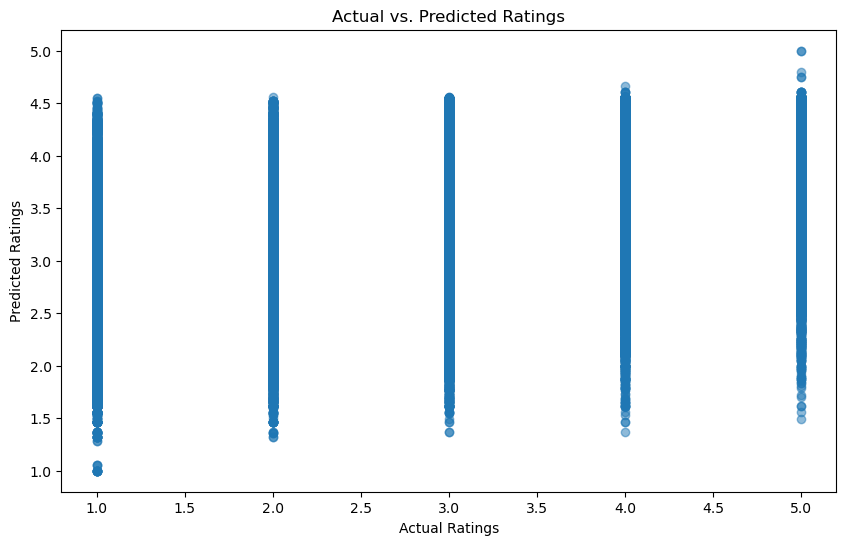

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [9]:
# Display actual and predicted ratings for a few examples
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.sample(10))

        Actual  Predicted
32793        5   4.520400
272398       4   3.903386
638287       4   4.201855
923184       3   2.658513
258518       5   3.797605
505230       3   3.841406
679166       1   3.352949
937132       3   3.095528
452996       3   3.904146
976093       4   3.938455


**advanced**

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")
print(f"Root Mean Squared Error (Gradient Boosting): {rmse_gb}")
print(f"R-squared (Gradient Boosting): {r2_gb}")

Mean Squared Error (Gradient Boosting): 0.9516994742554048
Root Mean Squared Error (Gradient Boosting): 0.9755508568267494
R-squared (Gradient Boosting): 0.23872768079031648


In [11]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the best model
best_mse_gb = mean_squared_error(y_test, y_pred_best_gb)
best_rmse_gb = best_mse_gb ** 0.5
best_r2_gb = r2_score(y_test, y_pred_best_gb)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Mean Squared Error (Best Gradient Boosting): {best_mse_gb}")
print(f"Root Mean Squared Error (Best Gradient Boosting): {best_rmse_gb}")
print(f"R-squared (Best Gradient Boosting): {best_r2_gb}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error (Best Gradient Boosting): 0.9515726235389986
Root Mean Squared Error (Best Gradient Boosting): 0.975485839742945
R-squared (Best Gradient Boosting): 0.2388291497326498
